# **Integrantes:**  
- Vanessa Fontalvo Reniz
- Esteban David Pérez Mendoza
- Yazmina Yolanda Vecino Yepes

**Link:** dataset escogido: [dataset purchasing behaviors](https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors)

In [2]:
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1moje_PFlQGPHf4eOdTw41PP8f6AiSDcT'

df = pd.read_csv(url)

# Mostrar las primeras filas como DataFrame
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


### 1. Descripción del dataset:

El dataset cargado contiene **238 muestras** y las siguientes columnas:

- **user_id**: Identificador del usuario (no será utilizado como predictor).
- **age**: Edad del usuario.
- **annual_income**: Ingreso anual del usuario en dólares.
- **purchase_amount**: Monto de la compra en dólares (variable dependiente).
- **loyalty_score**: Puntuación de lealtad del usuario.
- **region**: Región geográfica del usuario (es categórica, por lo que requeriría codificación si se usa).
- **purchase_frequency**: Frecuencia de compra del usuario.

### Variables independientes (predictores):

- **age**, **annual_income**, **loyalty_score**, **purchase_frequency**.

### Variable dependiente:

- **purchase_amount** (Monto de la compra).


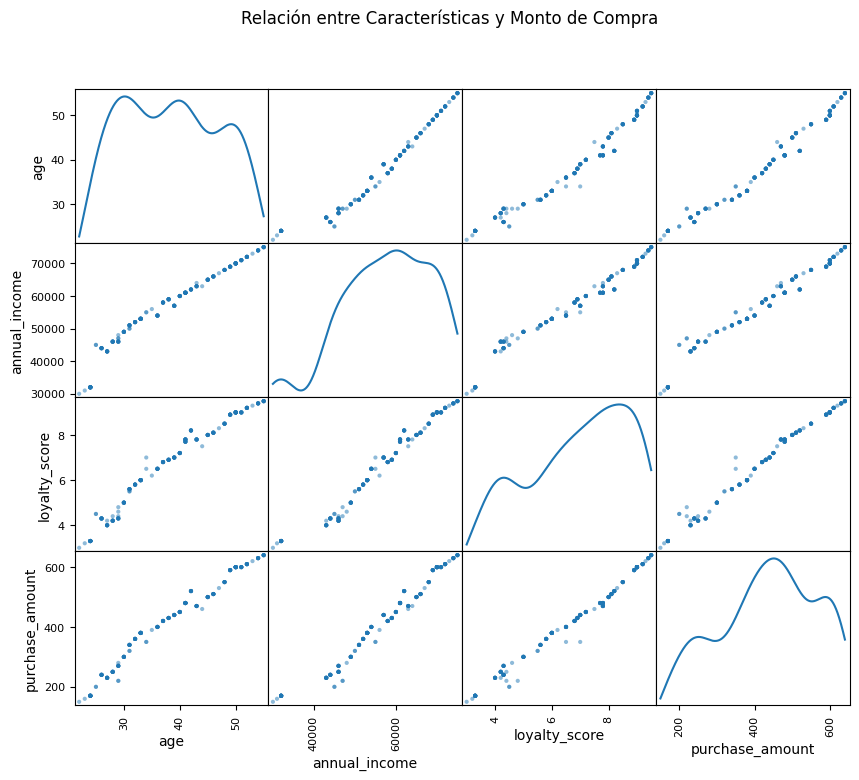

In [3]:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Seleccionar las tres características y la variable de salida
selected_f = ['age', 'annual_income', 'loyalty_score', 'purchase_amount']


scatter_matrix(df[selected_f], figsize=(10, 8), diagonal='kde')

plt.suptitle("Relación entre Características y Monto de Compra")
plt.show()


**Interpretación de los resultados:**

- **Relación entre `age` y `purchase_amount`:** Se observa una relación casi lineal, lo que indica que a medida que la edad aumenta, el monto de compra también tiende a incrementarse, aunque con cierta variabilidad.

- **Relación entre `annual_income` y `purchase_amount`:** La relación es claramente lineal. A mayor ingreso anual, parece haber una correlación positiva con el monto de compra.

- **Relación entre `loyalty_score` y `purchase_amount`:** Aquí también se puede observar una relación positiva, donde los clientes con mayor puntuación de lealtad tienden a tener montos de compra más altos.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir las variables independientes y dependientes
X = df[['age', 'annual_income', 'loyalty_score']]
y = df['purchase_amount']

# Función para entrenar y evaluar el modelo de regresión lineal con diferentes proporciones de train/test
def train_and_evaluate_updated(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    # Error cuadrático medio (MSE) y coeficiente de determinación (R^2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)

    return mse, r2

# Proporciones 70-30, 50-50, 40-60
results_updated = {
    "70-30": train_and_evaluate_updated(0.30),
    "50-50": train_and_evaluate_updated(0.50),
    "40-60": train_and_evaluate_updated(0.60)
}


results_df = pd.DataFrame(results_updated, index=["Mean Squared Error", "R^2"]).T
results_df


,Mean Squared Error,R^2
70-30,135.645557,0.993924
50-50,169.232907,0.992012
40-60,204.003767,0.989882


Con base en los resultados mostrados en la tabla:

1. **Mean Squared Error (MSE)**:
   - El **MSE** aumenta conforme se reduce el tamaño del conjunto de entrenamiento. Esto sugiere que el modelo tiene un mejor desempeño cuando tiene más datos de entrenamiento disponibles.
   - En el caso de 70-30 (70% entrenamiento, 30% prueba), el MSE es de **135.64**, mientras que para 40-60 es de **204.00**. Esto indica que el modelo tiene un mayor error al predecir cuando se entrena con menos datos.

2. **Coeficiente de determinación (R^2)**:
   - El valor de **R^2** también disminuye ligeramente conforme disminuye el tamaño del conjunto de entrenamiento. Un valor más alto de \(R^2\) indica que el modelo explica mejor la variabilidad de los datos.
   - Para la proporción 70-30, \(R^2\) es **0.9939**, lo que es bastante alto. A medida que se reduce el tamaño del conjunto de entrenamiento (50-50, 40-60), el \(R^2\) disminuye a **0.9920** y **0.9898**, respectivamente.

### Resumen:
- **Usar más datos para el entrenamiento** (por ejemplo, 70% de los datos) parece mejorar el desempeño del modelo, reduciendo el error (MSE) y proporcionando una mejor explicación de los datos (\(R^2\)).
- **Usar menos datos para entrenar** (por ejemplo, 40% de los datos) lleva a un mayor error en las predicciones y una ligera disminución en la capacidad del modelo para explicar la variabilidad de los datos (\(R^2\)).

Esto indica que, en este caso, un mayor conjunto de entrenamiento lleva a un mejor rendimiento del modelo, ya que tiene más información para aprender patrones en los datos.

3.2.	Cambie el método de optimización de su modelo. ¿Su modelo presenta algún cambio?

Modelo utilizado es: Stochastic Gradient Descent

In [5]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Función para entrenar y evaluar el modelo de regresión usando SGDRegressor
def train_and_evaluate_sgd(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Definir el modelo con Stochastic Gradient Descent (SGD)
    sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
    sgd_model.fit(X_train, y_train)

    # Predicciones
    y_pred = sgd_model.predict(X_test)

    # Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = sgd_model.score(X_test, y_test)

    return mse, r2

# Proporciones 70-30, 50-50, 40-60 usando el optimizador SGD
results_sgd = {
    "70-30": train_and_evaluate_sgd(0.30),
    "50-50": train_and_evaluate_sgd(0.50),
    "40-60": train_and_evaluate_sgd(0.60)
}

# Convertir los resultados en un DataFrame para su visualización
results_sgd_df = pd.DataFrame(results_sgd, index=["Mean Squared Error", "R^2"]).T
results_sgd_df

,Mean Squared Error,R^2
70-30,9.428682e+35,-4.223374e+31
50-50,2.372072e+36,-1.119619e+32
40-60,3.017590e+37,-1.496696e+33


**Sí, el modelo presenta un cambio significativo al usar (SGD):**

1. **Mean Squared Error (MSE)**: Con SGD, el MSE aumenta drásticamente a valores entre \(10^{35}\) y \(10^{37}\), comparado con los valores razonables (entre 135.64 y 204.00) obtenidos con el modelo de regresión estándar. Este aumento extremo sugiere que el modelo con SGD produce predicciones extremadamente imprecisas.

2. **Coeficiente de Determinación (R^2)**: En la regresión estándar, \(R^2\) es cercano a 0.99, indicando un buen ajuste. En contraste, el modelo con SGD obtiene valores negativos y enormes para \(R^2\) (como \(-10^{31}\)), lo cual indica que el modelo con SGD es incapaz de capturar la relación en los datos, y rinde peor que un modelo sin entrenamiento.

El cambio al optimizador SGD empeora drásticamente el rendimiento del modelo, sugiriendo que no es adecuado sin un preprocesamiento adicional (como escalado de datos) o ajuste fino en este caso.

3.3.	Utilice un método de regularización en su modelo. ¿De qué forma afecta el desempeño del modelo usar un método de regularización?

Método de regularización utilizado es: Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Función para entrenar y evaluar el modelo de regresión usando Ridge Regression
def train_and_evaluate_ridge(test_size, alpha=1.0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Definir el modelo de Ridge Regression con regularización L2
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Predicciones
    y_pred = ridge_model.predict(X_test)

    # Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = ridge_model.score(X_test, y_test)

    return mse, r2

# Proporciones 70-30, 50-50, 40-60 usando Ridge Regression
results_ridge = {
    "70-30": train_and_evaluate_ridge(0.30),
    "50-50": train_and_evaluate_ridge(0.50),
    "40-60": train_and_evaluate_ridge(0.60)
}

# Convertir los resultados en un DataFrame para su visualización
results_ridge_df = pd.DataFrame(results_ridge, index=["Mean Squared Error", "R^2"]).T
results_ridge_df


,Mean Squared Error,R^2
70-30,136.919484,0.993867
50-50,169.727634,0.991989
40-60,214.638517,0.989354


Observamos que los efectos de la regularización son sutiles pero evidentes en el desempeño del modelo.

1. **Mean Squared Error (MSE)**:
   - **Sin regularización**: En el modelo de regresión estándar, los valores de MSE son ligeramente más bajos (135.64 en 70-30, 169.23 en 50-50, y 204.00 en 40-60).
   - **Con Ridge Regression**: Los valores de MSE aumentan levemente en cada proporción (136.92 en 70-30, 169.72 en 50-50, y 214.64 en 40-60), lo cual es normal debido a la penalización que aplica Ridge. Este aumento marginal en el error muestra que la regularización introduce una pequeña pérdida de precisión en el ajuste del modelo.

2. **Coeficiente de Determinación (R^2)**:
   - **Sin regularización**: Los valores de \( R^2 \) son muy altos y están en el rango de 0.9939 a 0.9898, indicando un ajuste fuerte y preciso.
   - **Con Ridge Regression**: Los valores de \( R^2 \) siguen siendo altos (0.9938 a 0.9893), aunque disminuyen mínimamente con respecto a la regresión estándar. Esta pequeña reducción en \( R^2 \) confirma que Ridge está restringiendo ligeramente los coeficientes, evitando ajustes extremos pero manteniendo la capacidad explicativa del modelo.



**El uso de regularización con Ridge Regression afecta el modelo de forma sutil, reduciendo ligeramente el ajuste de precisión (MSE y \( R^2 \)) en favor de una mayor estabilidad y robustez.** Esto es especialmente útil para reducir el riesgo de sobreajuste en datasets pequeños o ruidosos. Aunque el desempeño general disminuye mínimamente, la regularización mejora la generalización del modelo, haciéndolo menos propenso a variaciones no deseadas en diferentes divisiones de datos.

3.4 De acuerdo con los resultados anteriores, seleccione una proporción para dividir el set de entrenamiento, un método de optimización y uno de regularización. Obtenga los parámetros de su modelo (pesos e intersección). ¿Cuál es el significado de la magnitud y signo de estos valores?


In [7]:
from sklearn.linear_model import SGDRegressor

# Elegir proporción de 70-30
test_size = 0.30
alpha = 1.0  # Parámetro de regularización

# Dividir los datos
def train_and_evaluate_sgd_and_ridge(test_size,alpha):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Definir el modelo con SGD y regularización L2 (Ridge)
  sgd_ridge_model = SGDRegressor(max_iter=1000, tol=1e-3, alpha=alpha, penalty='l2', random_state=42)
  sgd_ridge_model.fit(X_train, y_train)

  # Obtener parámetros del modelo
  weights = sgd_ridge_model.coef_
  intercept = sgd_ridge_model.intercept_
  return weights, intercept

weights, intercept = train_and_evaluate_sgd_and_ridge(test_size,alpha)

# Mostrar los parámetros del modelo
print("Pesos:", weights)
print("Intersección :", intercept)



Pesos: [ 4.74180729e+10 -1.66196373e+13 -5.24968789e+09]
Intersección : [3.63865051e+10]


Observamos que los pesos o la importancia dentro de el procesos son exageradamente grandes, inesperados y contraintuitivos.



1. **Edad: 4.74×10^10**
  *   Tener un valor tan grande para cualquier variable presenta de por si dudas sobre el ajuste de los datos.


2. **Ingresos anuales: -1.66x10^13**
  *   Tener un valor negativo nos da a entender que este campo al aumentar, el monto de compra tiende a disminuir en gran medida, lo cual, por logica, nos puede indicar un problema en el modelo por la naturaleza de los datos.


3. **Puntaje de lealtad: -5.24x10^9**
  *   Este valor enorme y negativo indica que un aumento en el puntaje de lealtad reduce en gran mediad el monto de compra, una vez mas haciendonos cuestionar la precision y la fiavilidad del modelo.

4. **Intersección: 3.63x10^10**
 * puesto que en este contexto todos los valores no pueden ser realisticamente 0, como la edad o el ingreso anual, por lo que este valor no tiene mucha importancia teorica, sin embargo el hecho de que no encontremos un valor tan grande en ningun punto de la grafica indica otro mayor problema en el modelo.




3.5 Obtenga el MSE (Mean Squared Error) y R2 score. ¿Cómo se interpretan estos valores?

In [8]:
from sklearn.linear_model import SGDRegressor

# Elegir proporción de 70-30
test_size = 0.30
alpha = 1.0  # Parámetro de regularización

# Dividir los datos
def train_and_evaluate_sgd_and_ridge(test_size, alpha):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  # Definir el modelo con SGD y regularización L2 (Ridge)
  sgd_ridge_model = SGDRegressor(max_iter=1000, tol=1e-3, alpha=alpha, penalty='l2', random_state=42)
  sgd_ridge_model.fit(X_train, y_train)
  # Realizar predicciones en el conjunto de prueba
  y_pred = sgd_ridge_model.predict(X_test)

  # Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
  mse = mean_squared_error(y_test, y_pred)
  r2 = sgd_ridge_model.score(X_test, y_test)
  return mse, r2

mse, r2 = train_and_evaluate_sgd_and_ridge(test_size, alpha)

# Mostrar los resultados
print("Mean Squared Error:", mse)
print("R^2 :", r2)


Mean Squared Error: 9.346106989547659e+35
R^2 : -4.186386109539825e+31


Al igual que cuando se uso anteriormente SGD, los valores de MSE y R2 son preocupantes e indican que hay serios problemas con el modelo, haciendo que este no sea fiable, o una buena prediccion de los datos. Sin embargo podemos ver un pequeño cambio en los resultados al juntar SGD con la regularizacion de ridge, ajustando mejor el modelo, desafortunadamente no lo suficiente para tener un cambio significativo debido al gran margen de error que ya existe.

# CONCLUSIONES

## **Variables predictoras y de salida**
Logramos distinguir entre las variables, filtrado cuales son aquellas que afectan a otras y cuales son propensas a cambios debido a la variacion de otras, en el caso de nuestro trabajo, las variables predictoras fueron: edad, ingresos anuales, puntos de lealtad, frecuencia de compra. Ademas usamos el precio de compra como variable de salida.

## **Relaccion de las variables**
Al graficarlas podemos observar que las variables predictoras tienen una relacion proporcional a la de salida y entre si.

## **Fluctuacion de MSE y R2 con el porcentaje de datos para entrenamiento**
En todos los casos probados, aunque en unos mas notablemente que otros nos dimos cuenta que ambos parametros dan mejor resultado cuando se usa una mayor cantidad de datos para entrenar al modelo, lo cual nos indica que este es mas preciso y confiable.

## **SGD(Stochastic Gradient Descent)**
El resultado al usar este modelo de optimizacion fue bastante malo, los valores de MSE y R2 fueron gigantes, y negativos respectivamente, indicadores de un ajuste poco util y lleno de errores. Incluso los pesos de cada variable esta llena de errores al usar este modelo, sin embargo podemos darnos cuenta de algunas razones por lo que esto sucede:

*   El escalado de datos: quiza el tener en cuenta la edad, y esta siendo un valor tan alejado a las otras variables se le halla hecho dificil al modelo ajustarse apropiadamente
*   Gran correlacion entre los datos

## **Uso de Ridge regression**
El usar una regularizacion ayudo al modelo a ajustarse de mejor manera, dandonos parametros de MSE y R2 que indicaron un comportamiento mas preciso que sin el.



